In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import seaborn as sns
from urllib.request import urlretrieve

In [2]:
url_cases = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'
url_cases_state = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'
url_death = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv'
url_death_state = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv'
url_population = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv'
url_school = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/vax_school.csv'

urlretrieve(url_cases, 'cases.csv')
urlretrieve(url_cases_state, 'cases_state.csv')
urlretrieve(url_death, 'death.csv')
urlretrieve(url_death_state, 'death_state.csv')
urlretrieve(url_population, 'population.csv')
urlretrieve(url_school, 'school.csv')

('school.csv', <http.client.HTTPMessage at 0x1b3a6460>)

In [3]:
cases = pd.read_csv('cases.csv')
cases.head(5);

In [4]:
cases_state = pd.read_csv('cases_state.csv')
cases_state.head(5);

In [5]:
death = pd.read_csv('death.csv')
death.head(5);

In [6]:
death_state = pd.read_csv('death_state.csv')
death_state.head(5)

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,Johor,1,0,1,0,1,0,0,0,0
1,2020-03-17,Kedah,0,0,0,0,0,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0,0,0,0,0,0
3,2020-03-17,Melaka,0,0,0,0,0,0,0,0,0
4,2020-03-17,Negeri Sembilan,0,0,0,0,0,0,0,0,0


In [7]:
population = pd.read_csv('population.csv')
population.head(5)

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
0,Malaysia,0,32657100,23528200,3649000,3111400,3550500
1,Johor,1,3794200,2733400,445600,353900,409800
2,Kedah,2,2193600,1554800,282300,209700,254100
3,Kelantan,3,1928900,1258700,202100,211200,271700
4,Melaka,4,937800,683700,123200,85600,98200


In [8]:
school = pd.read_csv('school.csv')
heng_ee = school[school.school == 'SMK HENG EE']
heng_ee

,code,school,state,district,postcode,lat,lon,dose1_staff,dose2_staff,dose3_staff,...,dose2_9,dose2_10,dose2_11,dose2_12,dose2_13,dose2_14,dose2_15,dose2_16,dose2_17,dose2_18
6456,PEB1103,SMK HENG EE,7,72,11600,5.401456,100.309369,99.5,99.5,75.6,...,NaN,NaN,NaN,100.0,98.7,99.1,98.1,99.8,100.0,100.0


In [9]:
state = [i for i in cases_state['state'].head(16)]
sum_state = [cases_state[cases_state.state == i].cases_new.sum() for i in state]

dict_sum_state = pd.DataFrame(columns=['Total_cases'])
for i, j in zip(sum_state, state):
    dict_sum_state = dict_sum_state.append(pd.DataFrame([i], columns=['Total_cases'], index=[j]))
    
statistics_state = dict_sum_state
statistics_state


,Total_cases
Johor,296185
Kedah,207255
Kelantan,197826
Melaka,90688
Negeri Sembilan,131935
Pahang,115169
Perak,139902
Perlis,9709
Pulau Pinang,188583
Sabah,298110


Text(0.5, 1.0, 'Cases per state')

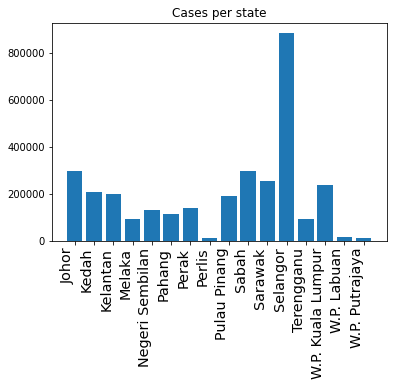

In [10]:
plt.bar(state, sum_state)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);
plt.title('Cases per state')

In [11]:
sum_death_state = [death_state[death_state.state == i].deaths_new.sum() for i in state]

# dict_sum_death_state = pd.DataFrame(columns=['Total_death'])
# for i, j in zip(sum_death_state, state):
#     dict_sum_death_state = dict_sum_death_state.append(pd.DataFrame([i], columns=['Total_death'], index=[j]))
# dict_sum_death_state

dict_sum_death_state = pd.concat([pd.DataFrame([i], columns=['Total_death'], index=[j]) for i, j in zip(sum_death_state, state)])

statistics_state['Total_death'] = dict_sum_death_state
statistics_state

,Total_cases,Total_death
Johor,296185,3969
Kedah,207255,2211
Kelantan,197826,1292
Melaka,90688,978
Negeri Sembilan,131935,1347
Pahang,115169,817
Perak,139902,1472
Perlis,9709,139
Pulau Pinang,188583,1783
Sabah,298110,2893


In [12]:
statistics_state['Death_rate'] = statistics_state.Total_death / statistics_state.Total_cases * 100
statistics_state['Death_rate'] = statistics_state['Death_rate'].astype(float).round(2)
statistics_state

,Total_cases,Total_death,Death_rate
Johor,296185,3969,1.34
Kedah,207255,2211,1.07
Kelantan,197826,1292,0.65
Melaka,90688,978,1.08
Negeri Sembilan,131935,1347,1.02
Pahang,115169,817,0.71
Perak,139902,1472,1.05
Perlis,9709,139,1.43
Pulau Pinang,188583,1783,0.95
Sabah,298110,2893,0.97


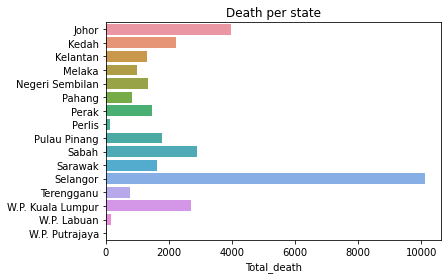

In [14]:
sns.barplot(x='Total_death', y=statistics_state.index, data=statistics_state);
plt.title('Death per state');